# DDF Flares

Roughly how many do we flares do we expect to see in each deep drilling field, if we assume only one flare per star? 

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from utils import *

/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [2]:
#Data adapted from Najita, Joan, et al. 
# "Maximizing science in the era of LSST: a community-based study of needed us capabilities." 
# arXiv preprint arXiv:1610.01661 (2016). Figure 5.6

lats = np.array([[-80.19031141868513, 130.40652877827023],
[-60.103806228373706, 255.84813859493633],
[-40.0173010380623, 755.1770453120364],
[-20.086505190311442, 3714.0247143871925],
[-10.121107266436013, 19820.632837951354]])[:,0]

flrs = np.array([[-80.19031141868513, 130.40652877827023],
[-60.103806228373706, 255.84813859493633],
[-40.0173010380623, 755.1770453120364],
[-20.086505190311442, 3714.0247143871925],
[-10.121107266436013, 19820.632837951354]])[:,1]

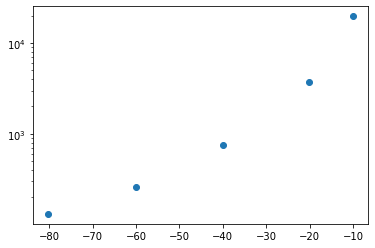

In [3]:
plt.scatter(lats, flrs)
plt.yscale('log')

In [4]:
from scipy.interpolate import interp1d

f = interp1d(lats, np.log10(flrs), kind='quadratic')

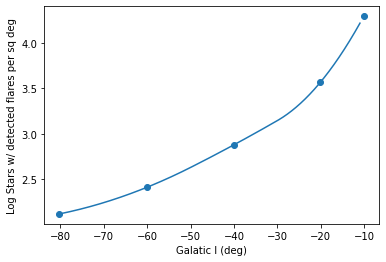

In [5]:
latn = np.arange(-80,-10.99,0.01)
flrn = f(latn)
plt.scatter(lats, np.log10(flrs))
plt.plot(latn,flrn)

plt.xlabel('Galatic l (deg)')
plt.ylabel('Log Stars w/ detected flares per sq deg');

In [6]:
ddfls = {'ELIAS S1':-72.90, 'XMM LSS':-58.77, 'Extended Chandra Deep-Field South':-54.47, 'COSMOS':-42.09, 'EDF:S':-47.17}

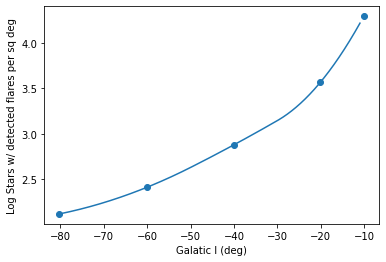

In [7]:
latn = np.arange(-80,-10.99,0.01)
flrn = f(latn)
plt.scatter(lats, np.log10(flrs))
plt.plot(latn,flrn)
plt.xlabel('Galatic l (deg)')
plt.ylabel('Log Stars w/ detected flares per sq deg');

In [8]:
logdensitylist= []
for ddf, ddfl in zip(ddfls.keys(), ddfls.values()):
    logdensity = flrn[np.where(np.abs(latn - ddfl) == np.abs(latn - ddfl).min())[0][0]]
    logdensitylist.append(logdensity)
    density = 10**logdensity
    ddf_g_density = density * 10 * (75/819) * (1200/819)
    print(ddf, ': ', np.round(ddf_g_density), ' flares in g-band')

ELIAS S1 :  212.0  flares in g-band
XMM LSS :  365.0  flares in g-band
Extended Chandra Deep-Field South :  449.0  flares in g-band
COSMOS :  896.0  flares in g-band
EDF:S :  668.0  flares in g-band


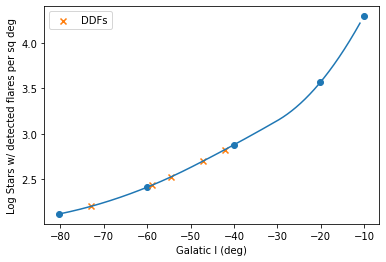

In [172]:
latn = np.arange(-80,-10.99,0.01)
flrn = f(latn)
plt.scatter(lats, np.log10(flrs))
plt.scatter(ddfls.values(), logdensitylist, marker='x', label='DDFs')
plt.plot(latn,flrn)
plt.xlabel('Galatic l (deg)')
plt.ylabel('Log Stars w/ detected flares per sq deg')
plt.legend();